In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
%matplotlib inline

In [3]:
mnist = datasets.fetch_mldata("MNIST original")

/Users/kalininalex/miniconda3/envs/py36_test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/Users/kalininalex/miniconda3/envs/py36_test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [6]:
mnist.data.shape

(70000, 784)

In [8]:
28 * 28

784

In [9]:
X = mnist.data.reshape(70000, 28, 28).astype(np.float32)

In [10]:
X.shape

(70000, 28, 28)

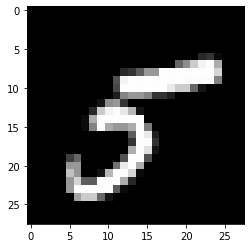

In [17]:
plt.imshow(X[34244], cmap="gray")

In [16]:
mnist.target[34244]

5.0

In [18]:
y = mnist.target.astype(np.long)

In [19]:
y.shape

(70000,)

In [21]:
torch.Tensor(np.random.randn(3, 2))

tensor([[-1.3852,  1.2618],
        [-0.0813, -0.9009],
        [ 0.3058,  0.7724]])

In [22]:
X_t = torch.from_numpy(X)
y_t = torch.from_numpy(y)

In [26]:
? nn.Conv2d

In [39]:
net = nn.Sequential(
    # 28 x 28 x 1
    
    nn.Conv2d(1, 6, kernel_size=9, stride=1, padding=4),
    nn.ReLU(),
    
    # 28 x 28 x 6
    
    nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0),
    
    # 14 x 14 x 6

    nn.Conv2d(6, 24, kernel_size=(7, 7), stride=1, padding=3),
    nn.ReLU(),
    
    # 14 x 14 x 24
    
    nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0),
    
    # 7 x 7 x 24
    
    nn.Flatten(),
    
    nn.Linear(7 * 7 * 24, 120),
    nn.ReLU(),
    
    nn.Linear(120, 10),
    nn.ReLU(),
    
    nn.LogSoftmax(dim=-1),
)

In [40]:
X_t = torch.Tensor(np.expand_dims(X, axis=1))
X_t.shape

torch.Size([70000, 1, 28, 28])

In [58]:
loss = nn.NLLLoss()
optim = torch.optim.SGD(net.parameters(), lr=1e-4)

In [53]:
y_pred = net(X_t)

In [54]:
loss_value = loss(y_pred, y_t)
loss_value

tensor(3.4826, grad_fn=<NllLossBackward>)

In [74]:
torch.exp(y_pred[1])

tensor([0.0687, 0.0035, 0.6511, 0.0372, 0.0017, 0.0017, 0.0958, 0.0017, 0.1103,
        0.0283], grad_fn=<ExpBackward>)

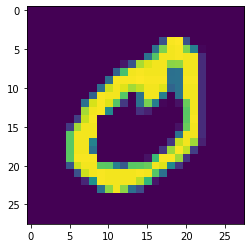

In [75]:
plt.imshow(X_t[1][0])

In [50]:
net.zero_grad()

In [51]:
loss_value.backward()

In [52]:
optim.step()

In [62]:
def train_batch(net, loss, epochs=3):
    optim = torch.optim.SGD(net.parameters(), 1e-4, momentum=0.9)

    batch_size = 16
    batches = int(X_t.shape[0] / batch_size)
    
    for i in range(epochs):
        for b in range(batches):
            start = b * batch_size
            end = start + batch_size
#             print(start, end)
            x_batch = X_t[start : end]
            y_batch = y_t[start : end]
        
             # Forward pass: compute predicted y by passing x to the model.
#             print(x_batch.shape)
            y_pred = net(x_batch)

            # Compute and print loss.
            loss_value = loss(y_pred, y_batch)

            # Reset gradient
            net.zero_grad()

            # Backward pass: compute gradient of the loss with respect to model
            # parameters
            loss_value.backward()

            # Calling the step function on an Optimizer makes an update to its
            # parameters
            optim.step()

        if True: # i % 1 == 1:
            print(i, "Loss:", loss_value.item())
#             print(i, "Test accuracy: ", accuracy(net(data.X_test_t), data.y_test_t))

In [63]:
train_batch(net, loss)

0 Loss: 0.0048551796935498714


KeyboardInterrupt: 

In [64]:
y_pred2 = net(X_t)

In [70]:
torch.exp(y_pred2[2])

tensor([0.0068, 0.0068, 0.0450, 0.3573, 0.5492, 0.0068, 0.0078, 0.0068, 0.0068,
        0.0068], grad_fn=<ExpBackward>)